<a href="https://colab.research.google.com/github/AstxMargaryan/Models/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees Algorithm: Comprehensive Learning Assignment

## Assignment Overview

Welcome to your comprehensive exploration of Decision Trees! This assignment will take you on a fascinating journey through one of the most intuitive and interpretable machine learning algorithms. Decision trees mirror how humans naturally make decisions - by asking a series of yes/no questions that progressively narrow down to a conclusion.

What makes decision trees particularly beautiful for learning is their transparency. Unlike many machine learning algorithms that operate as "black boxes," decision trees show you exactly how they arrive at their predictions. You can trace the path from root to leaf and understand every decision point. This interpretability makes them not only powerful tools for prediction but also valuable instruments for understanding your data and discovering hidden patterns.

Throughout this assignment, you'll discover how seemingly simple concepts like "which question should I ask first?" lead to sophisticated mathematical frameworks involving entropy, information gain, and optimization. You'll see how the recursive nature of tree building creates complex decision boundaries from simple binary splits, and you'll grapple with fundamental machine learning challenges like overfitting and the bias-variance tradeoff.

**Learning Journey:**
You'll begin by manually constructing decision trees to build intuition about how splits are chosen and how trees make predictions. Then you'll implement the algorithm from scratch, understanding every component from information gain calculations to tree traversal. Finally, you'll master advanced concepts like pruning, ensemble methods, and hyperparameter optimization that separate novice users from expert practitioners **(Optional)**.

**Part 4 is mainly advanced topics and is not required but highlt recommended.**

**Required Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, make_classification
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import graphviz
from collections import Counter
import math
import warnings
warnings.filterwarnings('ignore')


np.random.seed(42)


plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

---

## Part 1: Manual Decision Tree Construction - Building Intuition (5 Questions)

Understanding decision trees begins with grasping how we choose the best questions to ask and how we measure the quality of our splits. These manual exercises will build the foundational intuition you need to understand why certain mathematical concepts like entropy and information gain are central to tree construction.

### Question 1: Understanding Information and Entropy

You are analyzing a small dataset of weather conditions to predict whether people will play tennis outside. This classic example helps illustrate how decision trees quantify uncertainty and information.

**Training Data:**
| Day | Outlook | Temperature | Humidity | Wind | Play Tennis |
|-----|---------|-------------|----------|------|-------------|
| 1   | Sunny   | Hot         | High     | Weak | No          |
| 2   | Sunny   | Hot         | High     | Strong | No        |
| 3   | Overcast| Hot         | High     | Weak | Yes         |
| 4   | Rain    | Mild        | High     | Weak | Yes         |
| 5   | Rain    | Cool        | Normal   | Weak | Yes         |
| 6   | Rain    | Cool        | Normal   | Strong | No        |
| 7   | Overcast| Cool        | Normal   | Strong | Yes        |
| 8   | Sunny   | Mild        | High     | Weak | No          |
| 9   | Sunny   | Cool        | Normal   | Weak | Yes         |
| 10  | Rain    | Mild        | Normal   | Weak | Yes         |
| 11  | Sunny   | Mild        | Normal   | Strong | Yes        |
| 12  | Overcast| Mild        | High     | Strong | Yes        |
| 13  | Overcast| Hot         | Normal   | Weak | Yes         |
| 14  | Rain    | Mild        | High     | Strong | No        |

**Your Task:** Calculate the entropy of the entire dataset with respect to the "Play Tennis" attribute. Remember that entropy measures the uncertainty or "impurity" in your data. A pure set (all same class) has entropy 0, while maximum uncertainty occurs when classes are equally distributed.

**Entropy Formula:** H(S) = -Σ(p_i * log₂(p_i)) where p_i is the proportion of examples belonging to class i.

**Guiding Questions to Consider:**
- How many examples are there for each class (Yes/No)?
- What does it mean intuitively when entropy is high versus low?
- How would entropy change if all examples had the same label?

**Space for your calculations:**

In [ ]:
# You can use this space to verify your manual calculations
# But first, work through the entropy calculation by hand!


### Question 2: Information Gain and Feature Selection

Now you'll determine which attribute would be the best choice for the root node of your decision tree. This involves calculating information gain for each possible attribute.

**Your Task:** Calculate the information gain for splitting on each attribute (Outlook, Temperature, Humidity, Wind). Information gain measures how much uncertainty is reduced by knowing the value of an attribute.

**Information Gain Formula:** Gain(S,A) = H(S) - Σ((|Sv|/|S|) * H(Sv))
where Sv is the subset of S for which attribute A has value v.

**Steps to follow:**
1. For each attribute, group the examples by the attribute's values
2. Calculate the entropy of each subset
3. Calculate the weighted average entropy after splitting
4. Subtract from the original entropy to get information gain

**Detailed Analysis Required:**
- Which attribute gives the highest information gain?
- Intuitively explain why this attribute is the best choice for the first split
- What would happen if you chose an attribute with lower information gain?

**Advanced Thinking:** Consider what happens when an attribute perfectly separates the classes versus when it provides no separation at all. How do these scenarios relate to the information gain values you calculate?

### Question 3: Constructing the Complete Tree

Using your information gain calculations from Question 2, manually construct the complete decision tree for the tennis dataset.

**Your Task:**
1. Choose the root node based on your information gain calculations
2. For each branch from the root, recursively apply the same process to the remaining data
3. Continue until you reach pure leaf nodes or run out of attributes
4. Draw the complete tree structure showing all internal nodes and leaf nodes

**Tree Construction Guidelines:**
- At each internal node, show the attribute being tested
- Label each branch with the attribute value that leads down that path
- Label each leaf with the predicted class and the supporting examples
- Track how the entropy decreases as you move down the tree

**Critical Thinking Questions:**
- At what point do you stop splitting? What criteria determine when a node becomes a leaf?
- How does the tree structure reflect the importance of different attributes?
- Can you trace through the tree to classify a new example?

### Question 4: Handling Continuous Attributes

Modify the tennis dataset by replacing the categorical "Temperature" attribute with actual temperature values: Hot=85°F, Mild=75°F, Cool=65°F.

**Your Task:** Determine the best threshold for splitting on temperature. Unlike categorical attributes, continuous attributes require finding optimal cut-points.

**Process to Follow:**
1. Sort all examples by temperature value
2. Consider all possible split points (typically midpoints between consecutive values)
3. For each potential split, calculate the information gain
4. Choose the split that maximizes information gain

**New Dataset with Continuous Temperature:**
| Day | Temperature | Play Tennis |
|-----|-------------|-------------|
| 1   | 85          | No          |
| 2   | 85          | No          |
| 3   | 85          | Yes         |
| ... | ...         | ...         |

**Analysis Questions:**
- What temperature threshold gives the best split?
- How does handling continuous attributes change the tree construction process?
- What are the computational implications of continuous versus categorical attributes?

### Question 5: Gini Impurity Alternative

Calculate the same splits using Gini impurity instead of entropy, and compare the results.

**Gini Impurity Formula:** Gini(S) = 1 - Σ(p_i²) where p_i is the proportion of examples in class i.

**Your Task:**
1. Recalculate the impurity of the original dataset using Gini instead of entropy
2. Recalculate the impurity reduction (analogous to information gain) for each attribute
3. Compare the attribute rankings using Gini versus entropy
4. Discuss when you might prefer one measure over the other

**Comparative Analysis:**
- Do Gini and entropy give the same attribute rankings?
- Which measure is easier to compute, and why might this matter?
- How do the two measures handle extreme cases (very pure or very mixed nodes)?

**Conceptual Understanding:** Both entropy and Gini impurity measure node "impurity," but they have different mathematical properties. Entropy has a stronger theoretical foundation in information theory, while Gini is computationally simpler. Understanding when to use each measure is an important practical skill.

---

## Part 2: Implementing Decision Trees from Scratch (7-Step Implementation)

Now you'll build a complete decision tree implementation from the ground up. This hands-on construction will deepen your understanding of every algorithmic component and give you the flexibility to modify the algorithm for specific needs.

### Step 1: Node Structure and Basic Classes

Begin by defining the fundamental building blocks of your decision tree. The elegance of decision trees lies in their recursive structure - each subtree is itself a complete decision tree.

In [ ]:
class TreeNode:


    def __init__(self, is_leaf=False):


        self.is_leaf = is_leaf


        self.feature_index = None
        self.threshold = None
        self.feature_value = None


        self.prediction = None
        self.class_counts = None

        self.left = None
        self.right = None
        self.children = {}
        self.samples = 0
        self.impurity = 0.0
        self.depth = 0

    def __repr__(self):

        if self.is_leaf:
            return f"Leaf(prediction={self.prediction}, samples={self.samples})"
        else:
            return f"Node(feature={self.feature_index}, threshold={self.threshold}, samples={self.samples})"


root = TreeNode()
leaf = TreeNode(is_leaf=True)
print("Node classes created successfully!")
print(f"Root node: {root}")
print(f"Leaf node: {leaf}")

Node classes created successfully!
Root node: Node(feature=None, threshold=None, samples=0)
Leaf node: Leaf(prediction=None, samples=0)


### Step 2: Impurity Measures Implementation

Implement the mathematical foundations for measuring node quality. These functions determine how "pure" or "mixed" a set of examples is, which drives the entire tree construction process.

In [ ]:
def calculate_entropy(y):

    p_1 = np.count_nonzero(y)/len(y)
    p_0 = 1-p_1

    if p_0 == 0:
      return -(p_1*np.log2(p_1))
    elif p_1 == 0:
      return -(p_0*np.log2(p_0))
    else:
      return -(p_0*np.log2(p_0)+p_1*np.log2(p_1))


def calculate_gini_impurity(y):
    p_1 = np.count_nonzero(y)/len(y)
    p_0 = 1-p_1
    return 1-p_1**2-p_0**2

def calculate_mse(y, ):
    n = len(y)
    return 1/n*(np.sum((y-np.mean(y))**2))


test_labels_pure = np.array([1, 1, 1, 1])
test_labels_mixed = np.array([1, 0, 1, 0])
test_labels_skewed = np.array([1, 1, 1, 0])

print("Testing impurity measures:")
print(f"Pure set entropy: {calculate_entropy(test_labels_pure)}")
print(f"Mixed set entropy: {calculate_entropy(test_labels_mixed)}")
print(f"Skewed set entropy: {calculate_entropy(test_labels_skewed)}")

print("Testing impurity measures:")
print(f"Pure set gini: {calculate_gini_impurity(test_labels_pure)}")
print(f"Mixed set gini: {calculate_gini_impurity(test_labels_mixed)}")
print(f"Skewed set gini: {calculate_gini_impurity(test_labels_skewed)}")

print("Testing MSE measure:")
print(f"Pure set for MSE: {calculate_mse(test_labels_pure)}")
print(f"Mixed set for MSE: {calculate_mse(test_labels_mixed)}")
print(f"Skewed set for MSE: {calculate_mse(test_labels_skewed)}")





Testing impurity measures:
Pure set entropy: -0.0
Mixed set entropy: 1.0
Skewed set entropy: 0.8112781244591328
Testing impurity measures:
Pure set gini: 0.0
Mixed set gini: 0.5
Skewed set gini: 0.375
Testing MSE measure:
Pure set for MSE: 0.0
Mixed set for MSE: 0.25
Skewed set for MSE: 0.1875


### Step 3: Feature Splitting Logic

Implement the core logic for finding the best way to split data. This is where the algorithm decides which questions to ask and how to ask them.

In [ ]:
def find_best_split_categorical(X_column, y, impurity_func):

    best_value = None
    best_impurity_reduction = -float('inf')
    best_left_indices = None
    best_right_indices = None

    parent_impurity = impurity_func(y)
    unique_values = np.unique(X_column)

    for val in unique_values:
        left_indices = np.where(X_column == val)[0]
        right_indices = np.where(X_column != val)[0]

        if len(left_indices) == 0 or len(right_indices) == 0:
            continue

        left_impurity = impurity_func(y[left_indices])
        right_impurity = impurity_func(y[right_indices])

        weighted_impurity = (len(left_indices) * left_impurity + len(right_indices) * right_impurity) / len(y)
        impurity_reduction = parent_impurity - weighted_impurity

        if impurity_reduction > best_impurity_reduction:
            best_impurity_reduction = impurity_reduction
            best_value = val
            best_left_indices = left_indices
            best_right_indices = right_indices

    if best_value is None:
        return None, None, None, None

    return best_value, best_impurity_reduction, best_left_indices, best_right_indices


def find_best_split_continuous(X_column, y, impurity_func):

    sorted_indices = np.argsort(X_column)
    X_column = X_column[sorted_indices]
    y = y[sorted_indices]

    unique_values = np.unique(X_column)
    if len(unique_values) == 1:
        return None, None, None, None

    thresholds = (unique_values[:-1] + unique_values[1:]) / 2
    parent_impurity = impurity_func(y)

    best_threshold = None
    best_impurity_reduction = -float('inf')
    best_left_indices = None
    best_right_indices = None

    for threshold in thresholds:
        left_indices = np.where(X_column <= threshold)[0]
        right_indices = np.where(X_column > threshold)[0]

        if len(left_indices) == 0 or len(right_indices) == 0:
            continue

        left_impurity = impurity_func(y[left_indices])
        right_impurity = impurity_func(y[right_indices])

        weighted_impurity = (len(left_indices) * left_impurity + len(right_indices) * right_impurity) / len(y)
        impurity_reduction = parent_impurity - weighted_impurity

        if impurity_reduction > best_impurity_reduction:
            best_impurity_reduction = impurity_reduction
            best_threshold = threshold
            best_left_indices = left_indices
            best_right_indices = right_indices

    if best_threshold is None:
        return None, None, None, None

    return best_threshold, best_impurity_reduction, best_left_indices, best_right_indices


def find_best_feature_split(X, y, feature_types, impurity_func):

    best_feature = None
    best_split_info = None

    for feature_index in range(X.shape[1]):
        X_column = X[:, feature_index]
        feature_type = feature_types[feature_index]

        if feature_type == 'categorical':
            split = find_best_split_categorical(X_column, y, impurity_func)
        else:
            split = find_best_split_continuous(X_column, y, impurity_func)

        if split[1] is not None and (best_split_info is None or split[1] > best_split_info['impurity_reduction']):
            best_feature = feature_index
            best_split_info = {
                'best_value': split[0],
                'impurity_reduction': split[1],
                'left_indices': split[2],
                'right_indices': split[3]
            }

    return best_feature, best_split_info



sample_X = np.array([[1, 2.5], [2, 1.8], [1, 3.2], [3, 2.1], [2, 2.9]])
sample_y = np.array([0, 0, 1, 1, 1])
feature_types = ['categorical', 'continuous']

print("Testing split finding...")
best_feature_index, best_split = find_best_feature_split(sample_X, sample_y, feature_types, calculate_gini_impurity)

print(f"Best feature index: {best_feature_index}")
print(f"Best split info: {best_split}")


Testing split finding...
Best feature index: 1
Best split info: {'best_value': np.float64(2.7), 'impurity_reduction': 0.21333333333333337, 'left_indices': array([0, 1, 2]), 'right_indices': array([3, 4])}


### Step 4: Tree Building Algorithm

Implement the recursive tree construction algorithm. This is the heart of decision tree learning, where the magic of automatic rule discovery happens.

In [ ]:
class _DecisionTreeClassifier:


    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1,
                 impurity_measure='entropy', feature_types=None):

        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.impurity_measure = impurity_measure
        self.feature_types = feature_types
        self.root = None

        if impurity_measure == 'entropy':
            self.impurity_func = calculate_entropy
        elif impurity_measure == 'gini':
            self.impurity_func = calculate_gini_impurity
        else:
            raise ValueError("Invalid impurity_measure. Choose 'entropy' or 'gini'.")

    def _build_tree(self, X, y, depth=0, node_indices=None):

        if node_indices is None:
            node_indices = np.arange(len(y))

        node = TreeNode()
        node.samples = len(node_indices)
        node.depth = depth
        node.class_counts = dict(zip(*np.unique(y[node_indices], return_counts=True)))

        if len(np.unique(y[node_indices])) == 1:
            node.is_leaf = True
            node.prediction = y[node_indices][0]
            return node

        if (self.max_depth is not None and depth >= self.max_depth) or \
           len(node_indices) < self.min_samples_split:
            node.is_leaf = True
            node.prediction = np.bincount(y[node_indices]).argmax()
            return node

        best_feature, best_split = find_best_feature_split(
            X[node_indices], y[node_indices], self.feature_types, self.impurity_func
        )

        if best_feature is None or best_split is None:
            node.is_leaf = True
            node.prediction = np.bincount(y[node_indices]).argmax()
            return node

        node.feature_index = best_feature
        node.threshold = best_split['best_value']

        left_indices = node_indices[best_split['left_indices']]
        right_indices = node_indices[best_split['right_indices']]

        if len(left_indices) < self.min_samples_leaf or len(right_indices) < self.min_samples_leaf:
            node.is_leaf = True
            node.prediction = np.bincount(y[node_indices]).argmax()
            return node

        node.left = self._build_tree(X, y, depth + 1, left_indices)
        node.right = self._build_tree(X, y, depth + 1, right_indices)

        return node

    def fit(self, X, y):

        self.root = self._build_tree(X, y)

    def _predict_sample(self, x, node):

        if node.is_leaf:
            return node.prediction

        val = x[node.feature_index]
        if self.feature_types[node.feature_index] == 'categorical':
            if val == node.threshold:
                return self._predict_sample(x, node.left)
            else:
                return self._predict_sample(x, node.right)
        else:
            if val <= node.threshold:
                return self._predict_sample(x, node.left)
            else:
                return self._predict_sample(x, node.right)

    def predict(self, X):

        return np.array([self._predict_sample(sample, self.root) for sample in X])


### Step 5: Tree Visualization and Interpretation

Implement functions to visualize and interpret your decision trees. Understanding what the tree has learned is crucial for both debugging and gaining insights from your model.

In [ ]:
def print_tree(node, feature_names=None, class_names=None, indent="", max_depth=10):
    """
    Print a text representation of the decision tree.

    This function creates a human-readable representation that shows
    the decision rules learned by the tree.

    Parameters:
    node: TreeNode, root of tree/subtree to print
    feature_names: list, names of features for readable output
    class_names: list, names of classes for readable output
    indent: str, current indentation level
    max_depth: int, maximum depth to print (prevents overly long output)
    """
    # Your implementation here
    # Recursively print tree structure with proper indentation
    # Show decision rules at internal nodes and predictions at leaves
    pass

def visualize_tree_structure(node, feature_names=None, class_names=None):
    """
    Create a visual representation of the tree structure.

    Generate a matplotlib-based visualization showing the tree structure,
    decision boundaries, and class distributions at each node.
    """
    # Your implementation here
    # Create a graphical representation of the tree
    # This is more complex but very valuable for understanding
    pass

def extract_decision_rules(node, feature_names=None, path="", rules_list=None):
    """
    Extract all decision rules from the tree as text.

    Convert the tree into a set of if-then rules that can be easily
    understood and potentially used outside the tree structure.

    Parameters:
    node: TreeNode, current node
    feature_names: list, feature names
    path: str, current path conditions
    rules_list: list, accumulator for rules

    Returns:
    list: all decision rules as strings
    """
    # Your implementation here
    # Extract rules by traversing all root-to-leaf paths
    pass

# Test visualization functions
print("Testing tree visualization...")
# Build a simple tree and test your visualization functions

Testing tree visualization...


### Step 6: Regression Tree Implementation

Extend your implementation to handle regression problems. This demonstrates how the same algorithmic framework adapts to different types of prediction tasks.

In [ ]:
class _DecisionTreeRegressor:


    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):

        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.root = None

    def _build_tree(self, X, y, depth=0):

        node = TreeNode()
        node.samples = len(y)
        node.depth = depth
        node.prediction = np.mean(y)
        node.impurity = calculate_mse(y)

        if (self.max_depth is not None and depth >= self.max_depth) or \
           len(y) < self.min_samples_split or \
           len(np.unique(y)) == 1:
            node.is_leaf = True
            return node

        feature_types = ['continuous'] * X.shape[1]
        best_feature, best_split = find_best_feature_split(X, y, feature_types, calculate_mse)

        if best_feature is None or best_split is None:
            node.is_leaf = True
            return node

        left_indices = best_split['left_indices']
        right_indices = best_split['right_indices']

        if len(left_indices) < self.min_samples_leaf or len(right_indices) < self.min_samples_leaf:
            node.is_leaf = True
            return node

        node.feature_index = best_feature
        node.threshold = best_split['best_value']
        node.left = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        node.right = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return node

    def fit(self, X, y):

        self.root = self._build_tree(X, y)

    def _predict_sample(self, x, node):

        if node.is_leaf:
            return node.prediction

        if x[node.feature_index] <= node.threshold:
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)

    def predict(self, X):

        if hasattr(X, "iloc"):
          return [self._predict_sample(X.iloc[i], self.root) for i in range(len(X))]


        else:
          return [self._predict_sample(pd.Series(X[i]), self.root) for i in range(len(X))]


### Step 7: Advanced Features and Optimizations

Add sophisticated features that improve tree performance and provide more control over the learning process.

In [ ]:
def implement_pruning(tree_root, X_val, y_val, pruning_method='reduced_error'):
    """
    Implement tree pruning to reduce overfitting.

    Pruning removes subtrees that don't improve performance on validation data.
    This is crucial for creating trees that generalize well to new data.

    Parameters:
    tree_root: TreeNode, root of tree to prune
    X_val: validation features
    y_val: validation labels
    pruning_method: str, pruning strategy to use

    Returns:
    TreeNode: pruned tree root
    """
    # Your implementation here
    # Implement reduced error pruning or cost complexity pruning
    pass

def implement_feature_importance(tree_root, n_features):
    """
    Calculate feature importance scores based on tree structure.

    Feature importance measures how much each feature contributes
    to decreasing impurity across all splits in the tree.

    Parameters:
    tree_root: TreeNode, root of trained tree
    n_features: int, number of features

    Returns:
    array: importance scores for each feature
    """
    # Your implementation here
    # Traverse tree and accumulate impurity decreases for each feature
    pass

def implement_missing_value_handling(X, method='surrogate'):
    """
    Handle missing values in the dataset.

    Decision trees can handle missing values through surrogate splits
    or by treating missing as a separate category.

    Parameters:
    X: feature matrix with potential missing values
    method: str, method for handling missing values

    Returns:
    X_processed: processed feature matrix
    """
    # Your implementation here
    # Implement strategies for missing value handling
    pass

# Test advanced features
print("Testing advanced features...")

Testing advanced features...


---

## Part 3: Real-World Applications (2 Tasks)

Now you'll apply decision trees to real datasets, experiencing how they perform on practical problems and understanding their strengths and limitations in different contexts.

### Task 1: Medical Diagnosis Classification

The breast cancer dataset provides an excellent example of how decision trees can be used for medical diagnosis. This binary classification problem has clear real-world importance and interpretability requirements.

In [ ]:

cancer_data = load_breast_cancer()
X_cancer, y_cancer = cancer_data.data, cancer_data.target

print("Breast Cancer Dataset Information:")
print(f"Number of samples: {X_cancer.shape[0]}")
print(f"Number of features: {X_cancer.shape[1]}")
print(f"Classes: {cancer_data.target_names}")
print(f"Class distribution: {np.bincount(y_cancer)}")


feature_info = pd.DataFrame({
    'Feature': cancer_data.feature_names,
    'Mean': np.mean(X_cancer, axis=0),
    'Std': np.std(X_cancer, axis=0)
})
print("\nFirst 10 features:")
print(feature_info.head(10))


df_cancer = pd.DataFrame(X_cancer, columns=cancer_data.feature_names)


df_cancer['target'] = y_cancer
df_cancer.head(10)


Breast Cancer Dataset Information:
Number of samples: 569
Number of features: 30
Classes: ['malignant' 'benign']
Class distribution: [212 357]

First 10 features:
                  Feature        Mean         Std
0             mean radius   14.127292    3.520951
1            mean texture   19.289649    4.297255
2          mean perimeter   91.969033   24.277619
3               mean area  654.889104  351.604754
4         mean smoothness    0.096360    0.014052
5        mean compactness    0.104341    0.052766
6          mean concavity    0.088799    0.079650
7     mean concave points    0.048919    0.038769
8           mean symmetry    0.181162    0.027390
9  mean fractal dimension    0.062798    0.007054


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [ ]:
df_maligant = df_cancer[df_cancer['target']==1]
df_benign = df_cancer[df_cancer['target']==0]

<Axes: >

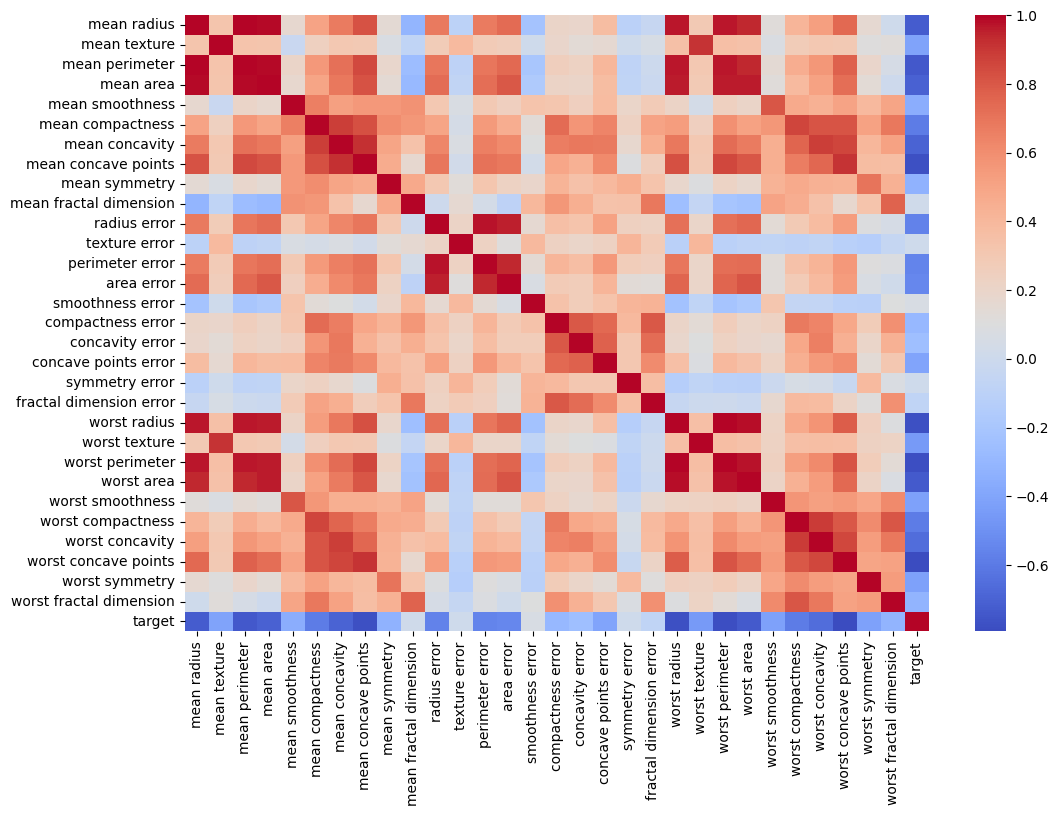

In [ ]:
corr = df_cancer.corr(numeric_only=True)
sns.heatmap(corr,  cmap = 'coolwarm')

In [ ]:
high_corr = corr.stack()
high_corr = high_corr[((np.abs(high_corr)>0.7) & (np.abs(high_corr)<1))]
most_correlated = high_corr.sort_values(key=abs, ascending=False).head(5)

print(most_correlated)

mean radius      mean perimeter     0.997855
mean perimeter   mean radius        0.997855
worst radius     worst perimeter    0.993708
worst perimeter  worst radius       0.993708
mean radius      mean area          0.987357
dtype: float64


In [ ]:
df_cancer
y = df_cancer['target']
x = df_cancer.drop('target', axis = 1)
x


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=100)
my_tree = _DecisionTreeClassifier(feature_types=['continuous'] * X_train.shape[1])

In [ ]:
my_tree.fit(X_train.values, y_train.values)

In [ ]:
y_predicted_mytree = my_tree.predict(X_test.values)
accuracy_mytree = accuracy_score(y_test, y_predicted_mytree)
print(f'Accuracy for my custom model {accuracy_mytree*100:.2f}%')
conf_matrix_mytree = confusion_matrix(y_test, y_predicted_mytree)
conf_matrix_mytree

Accuracy for my custom model 11.11%


array([[ 8, 61],
       [91, 11]])

In [ ]:
sklearn_tree = DecisionTreeClassifier()
sklearn_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predicted_sklearn = sklearn_tree.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_predicted_sklearn)
print(f'Accuracy for sklearn tree {accuracy_sklearn*100:.2f}%')
conf_matrix_sklearn = confusion_matrix(y_test, y_predicted_sklearn)
conf_matrix_sklearn

Accuracy for sklearn tree 94.74%


array([[63,  6],
       [ 3, 99]])

In [ ]:
optimized_tree_sklearn = DecisionTreeClassifier()
param_grid = {'max_depth':[2,3,5,8,10,13,15,18]}
grid_search = GridSearchCV(estimator = optimized_tree_sklearn, param_grid = param_grid, scoring = 'f1')
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 8, 10, 13, 15, 18]},
             scoring='f1')

In [ ]:
print("Best max_depth:", grid_search.best_params_['max_depth'])

Best max_depth: 3


In [ ]:
best_params_tree = DecisionTreeClassifier(max_depth = 5)
best_params_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_predicted_bestparams = best_params_tree.predict(X_test)
accuracy_bestparams = accuracy_score(y_test, y_predicted_bestparams)
print(f'Accuracy for model with best parameters: {accuracy_bestparams*100:.2f}%')
conf_matrix_bestparams = confusion_matrix(y_test, y_predicted_bestparams)
conf_matrix_bestparams

Accuracy for model with best parameters: 93.57%


array([[61,  8],
       [ 3, 99]])

[Text(0.605, 0.9166666666666666, 'x[27] <= 0.144\ngini = 0.46\nsamples = 398\nvalue = [143.0, 255.0]'),
 Text(0.41, 0.75, 'x[3] <= 696.25\ngini = 0.155\nsamples = 271\nvalue = [23, 248]'),
 Text(0.5075, 0.8333333333333333, 'True  '),
 Text(0.26, 0.5833333333333334, 'x[27] <= 0.122\ngini = 0.055\nsamples = 249\nvalue = [7, 242]'),
 Text(0.16, 0.4166666666666667, 'x[10] <= 0.626\ngini = 0.017\nsamples = 228\nvalue = [2, 226]'),
 Text(0.08, 0.25, 'x[21] <= 33.35\ngini = 0.009\nsamples = 224\nvalue = [1, 223]'),
 Text(0.04, 0.08333333333333333, 'gini = 0.0\nsamples = 209\nvalue = [0, 209]'),
 Text(0.12, 0.08333333333333333, 'gini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.24, 0.25, 'x[25] <= 0.085\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.28, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.36, 0.4166666666666667, 'x[18] <= 0.013\ngini = 0.363\nsamples = 21\nvalue = [5, 16

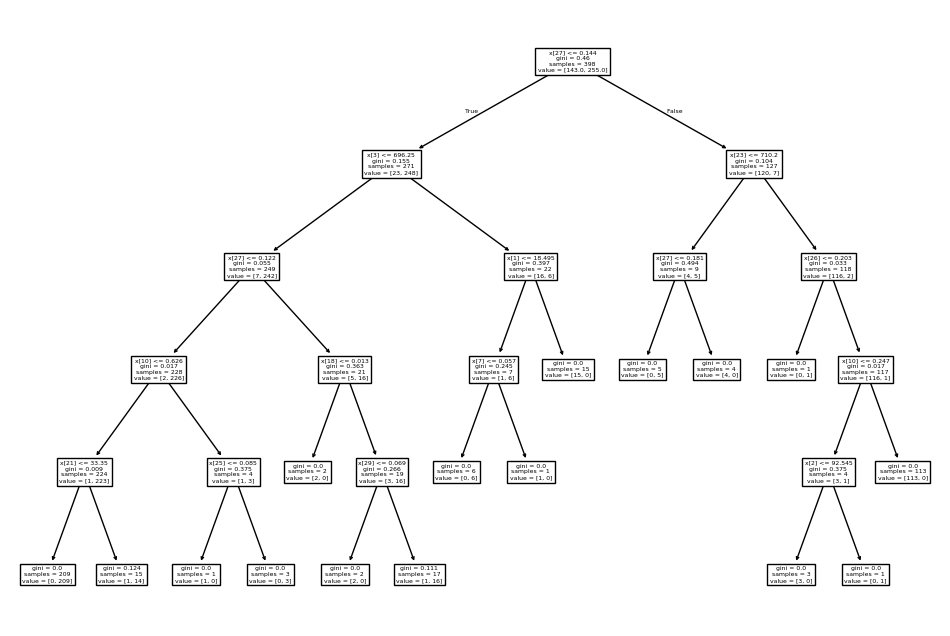

In [ ]:
plot_tree(best_params_tree)

### Task 2: Housing Price Prediction (Regression)

Create a comprehensive regression analysis using decision trees to predict housing prices. This task will deepen your understanding of how trees handle continuous target variables.

In [ ]:
# Create a realistic housing price dataset
np.random.seed(42)
n_samples = 1000

# Generate realistic housing features
square_feet = np.random.normal(2000, 600, n_samples)
bedrooms = np.random.poisson(3, n_samples) + 1
bathrooms = np.random.normal(2.5, 0.8, n_samples)
age = np.random.exponential(15, n_samples)
lot_size = np.random.lognormal(8, 0.5, n_samples)
garage = np.random.binomial(1, 0.7, n_samples)

# Create realistic neighborhood categories
neighborhoods = np.random.choice(['Downtown', 'Suburban', 'Rural', 'Waterfront'],
                                n_samples, p=[0.3, 0.5, 0.15, 0.05])

# Generate realistic price based on features with some noise
base_price = (square_feet * 150 +
              bedrooms * 10000 +
              bathrooms * 15000 +
              lot_size * 5 +
              garage * 20000 -
              age * 1000)

# Add neighborhood effects
neighborhood_effects = {'Downtown': 50000, 'Suburban': 0, 'Rural': -30000, 'Waterfront': 100000}
for i, neighborhood in enumerate(neighborhoods):
    base_price[i] += neighborhood_effects[neighborhood]

# Add realistic noise and ensure positive prices
price = base_price + np.random.normal(0, 25000, n_samples)
price = np.maximum(price, 50000)  # Minimum price floor

# Create feature matrix
X_housing = np.column_stack([square_feet, bedrooms, bathrooms, age, lot_size, garage])
feature_names = ['Square_Feet', 'Bedrooms', 'Bathrooms', 'Age', 'Lot_Size', 'Garage']

# Add categorical neighborhood feature (you'll need to encode this)
housing_df = pd.DataFrame(X_housing, columns=feature_names)
housing_df['Neighborhood'] = neighborhoods
housing_df['Price'] = price

print("Housing Dataset Information:")
print(f"Number of samples: {len(housing_df)}")
print(f"Features: {list(housing_df.columns[:-1])}")
print(f"Price range: ${price.min():,.0f} - ${price.max():,.0f}")
print(f"Average price: ${price.mean():,.0f}")


Housing Dataset Information:
Number of samples: 1000
Features: ['Square_Feet', 'Bedrooms', 'Bathrooms', 'Age', 'Lot_Size', 'Garage', 'Neighborhood']
Price range: $94,761 - $761,991
Average price: $410,582


In [ ]:
housing_df.head(10)

,Square_Feet,Bedrooms,Bathrooms,Age,Lot_Size,Garage,Neighborhood,Price
0,2298.028492,2.0,2.262099,6.842372,3033.413929,1.0,Downtown,466930.228205
1,1917.041419,3.0,2.302893,0.815828,1498.536966,0.0,Suburban,376516.455807
2,2388.613123,2.0,3.289101,21.093326,5907.864304,1.0,Downtown,529274.873122
3,2913.817914,8.0,1.930421,46.574893,3174.643731,0.0,Suburban,520539.633673
4,1859.507975,7.0,1.265757,4.119545,4562.208243,0.0,Rural,297741.980795
5,1859.517826,2.0,2.371495,5.862888,5496.836145,1.0,Suburban,376577.704445
6,2947.527689,2.0,2.112661,3.046675,3529.733944,1.0,Suburban,559182.562171
7,2460.460837,5.0,1.727003,12.903482,2216.932090,1.0,Suburban,476342.369521
8,1718.315368,6.0,2.359697,2.523465,4855.448177,0.0,Suburban,386042.512000
9,2325.536026,6.0,2.893205,6.605366,2982.084268,1.0,Waterfront,537477.103389


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Square_Feet   1000 non-null   float64
 1   Bedrooms      1000 non-null   float64
 2   Bathrooms     1000 non-null   float64
 3   Age           1000 non-null   float64
 4   Lot_Size      1000 non-null   float64
 5   Garage        1000 non-null   float64
 6   Neighborhood  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(7), object(1)
memory usage: 62.6+ KB


In [ ]:
housing_df.describe()

,Square_Feet,Bedrooms,Bathrooms,Age,Lot_Size,Garage,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2011.599233,3.974000,2.472902,14.265330,3361.414540,0.710000,410582.245957
std,587.529563,1.684685,0.795637,14.113157,1873.063191,0.453989,101458.371384
min,55.239596,1.000000,-0.041363,0.003616,767.926264,0.000000,94761.079245
25%,1611.445817,3.000000,1.956186,4.210353,2037.879706,0.000000,340540.120835
50%,2015.180367,4.000000,2.498306,9.726282,2919.879873,1.000000,410401.837386
75%,2388.766325,5.000000,3.021850,19.730957,4220.371746,1.000000,476036.197638
max,4311.638894,10.000000,4.990328,107.100966,17405.257483,1.000000,761991.129855


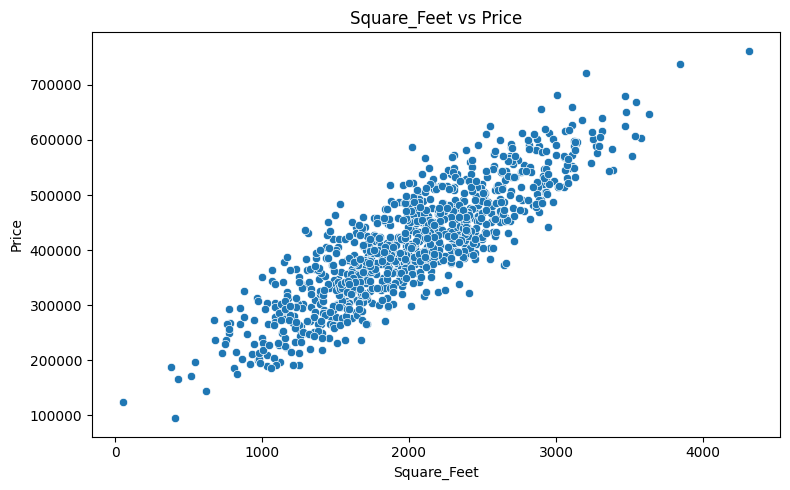

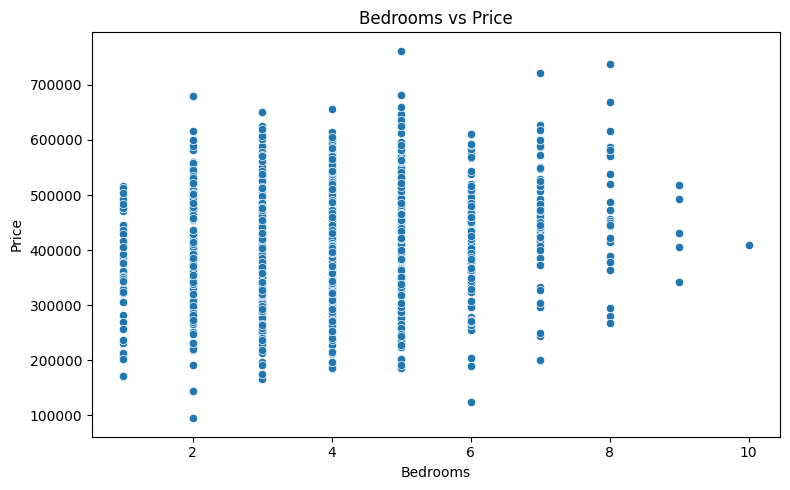

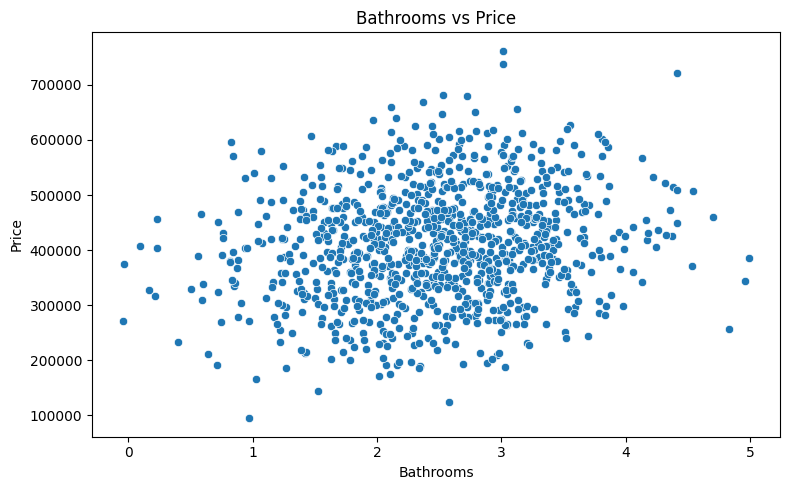

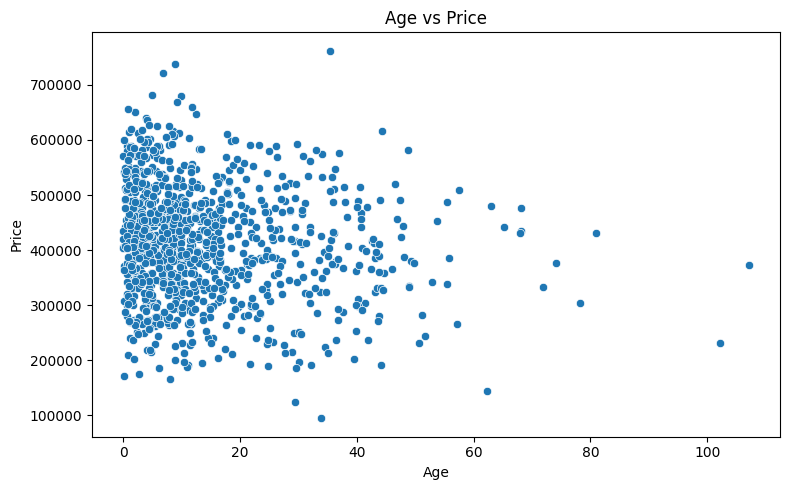

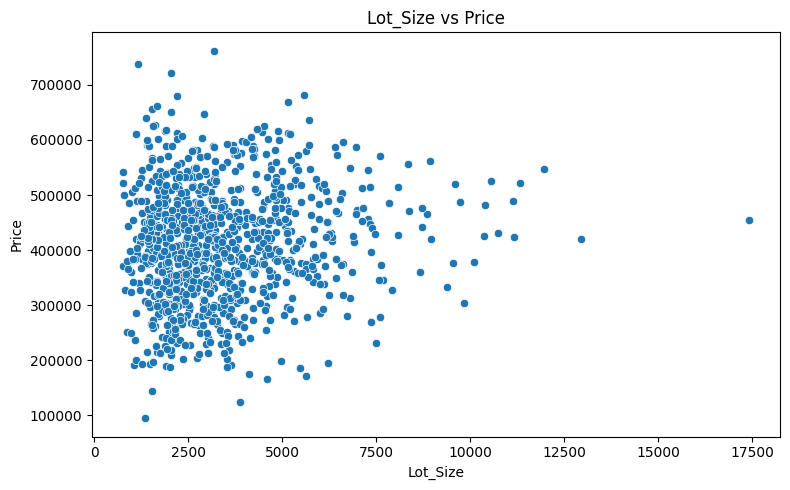

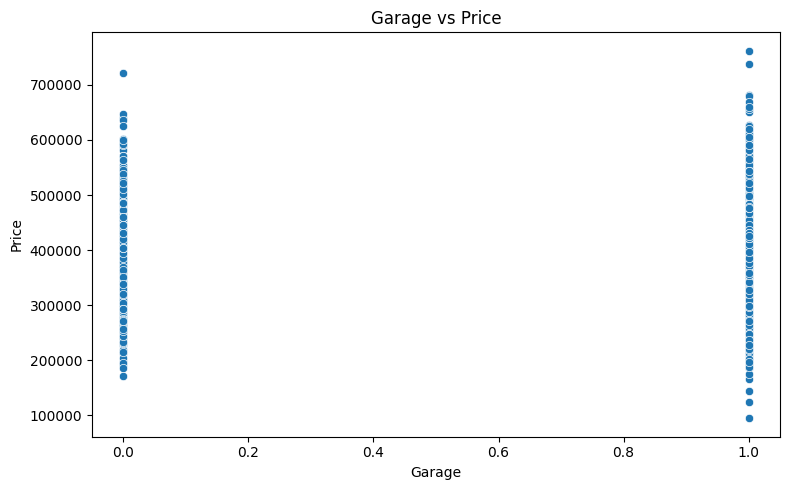

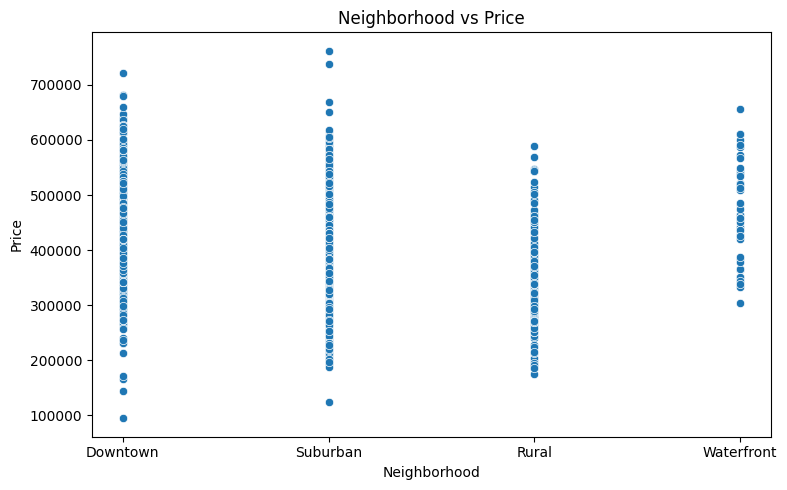

In [ ]:
for feature in housing_df.columns:
    if feature != 'Price':

        plt.figure(figsize=(8, 5))
        sns.scatterplot(data = housing_df, x = feature, y = 'Price')
        plt.title(f'{feature} vs Price')
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.tight_layout()

In [ ]:
correlated = housing_df.corr(numeric_only=True)
correlated

,Square_Feet,Bedrooms,Bathrooms,Age,Lot_Size,Garage,Price
Square_Feet,1.000000,0.019528,0.050043,0.013773,0.040056,-0.017588,0.866157
Bedrooms,0.019528,1.000000,0.011338,-0.040840,-0.042349,0.029395,0.185569
Bathrooms,0.050043,0.011338,1.000000,0.045491,-0.018240,0.005184,0.173457
Age,0.013773,-0.040840,0.045491,1.000000,0.042921,0.002129,-0.125462
Lot_Size,0.040056,-0.042349,-0.018240,0.042921,1.000000,-0.036997,0.111286
Garage,-0.017588,0.029395,0.005184,0.002129,-0.036997,1.000000,0.085318
Price,0.866157,0.185569,0.173457,-0.125462,0.111286,0.085318,1.000000


<Axes: >

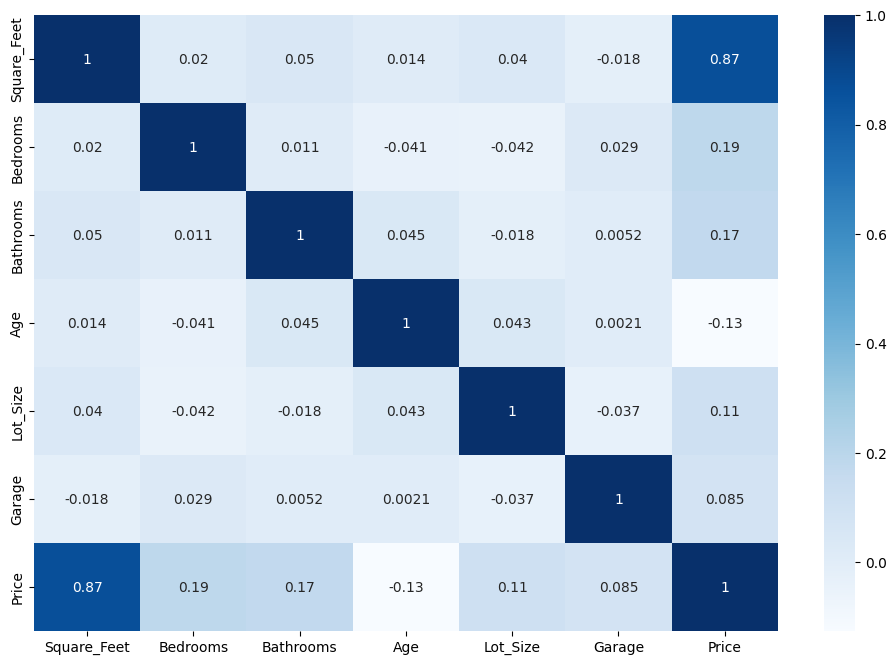

In [ ]:
sns.heatmap(correlated, annot = True, cmap = 'Blues')

<Axes: ylabel='Price'>

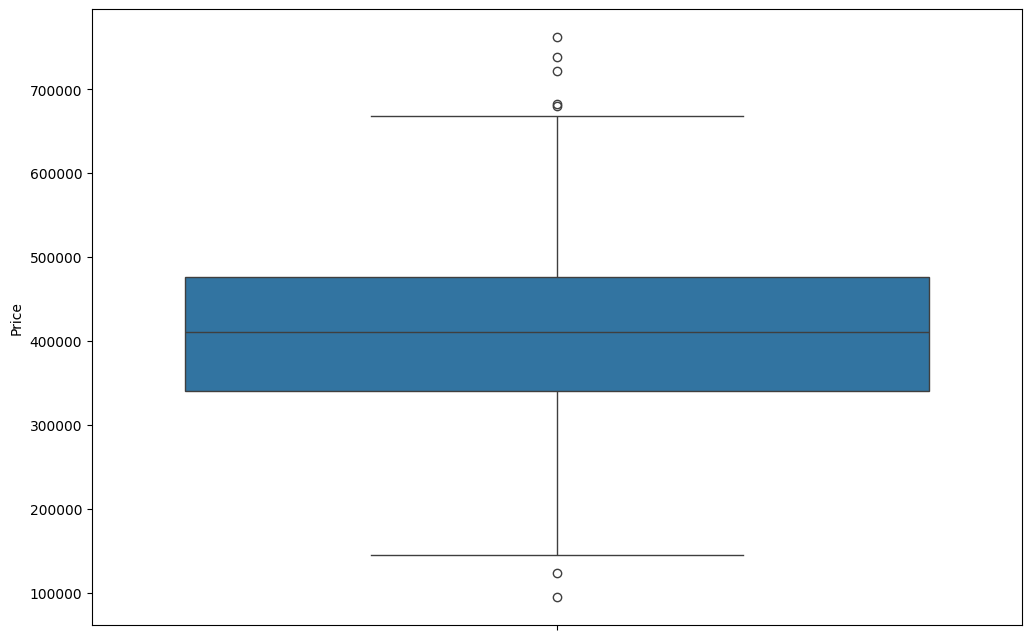

In [ ]:
sns.boxplot(housing_df['Price'])

<Axes: xlabel='Price', ylabel='Count'>

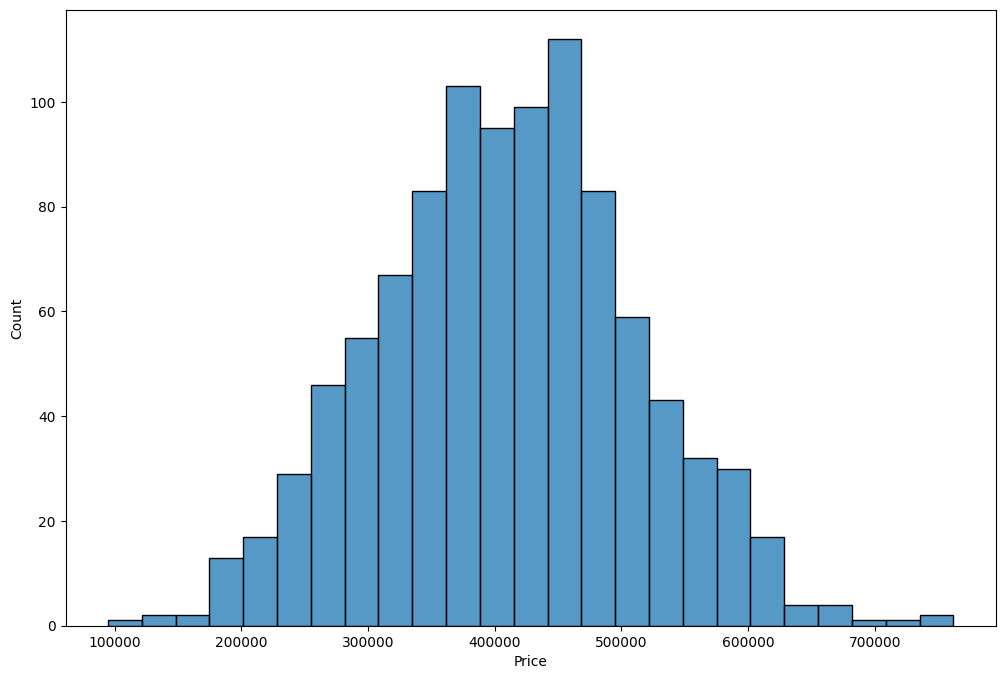

In [ ]:
sns.histplot(housing_df['Price'])

In [ ]:
housing_df['Price_per_Square'] = housing_df['Price']/housing_df['Square_Feet']
housing_df.head(10)

,Square_Feet,Bedrooms,Bathrooms,Age,Lot_Size,Garage,Neighborhood,Price,Price_per_Square
0,2298.028492,2.0,2.262099,6.842372,3033.413929,1.0,Downtown,466930.228205,203.187310
1,1917.041419,3.0,2.302893,0.815828,1498.536966,0.0,Suburban,376516.455807,196.404967
2,2388.613123,2.0,3.289101,21.093326,5907.864304,1.0,Downtown,529274.873122,221.582502
3,2913.817914,8.0,1.930421,46.574893,3174.643731,0.0,Suburban,520539.633673,178.645217
4,1859.507975,7.0,1.265757,4.119545,4562.208243,0.0,Rural,297741.980795,160.118690
5,1859.517826,2.0,2.371495,5.862888,5496.836145,1.0,Suburban,376577.704445,202.513630
6,2947.527689,2.0,2.112661,3.046675,3529.733944,1.0,Suburban,559182.562171,189.712403
7,2460.460837,5.0,1.727003,12.903482,2216.932090,1.0,Suburban,476342.369521,193.598842
8,1718.315368,6.0,2.359697,2.523465,4855.448177,0.0,Suburban,386042.512000,224.663365
9,2325.536026,6.0,2.893205,6.605366,2982.084268,1.0,Waterfront,537477.103389,231.119663


In [ ]:
my_regressor = _DecisionTreeRegressor()


In [ ]:
my_regressor.fit(X_train.values, y_train.values)

In [ ]:
y_predicted_myregressor = my_regressor.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test, y_predicted_myregressor)
print(f'MSE of my regressor model is : {MSE}')

MSE of my regressor model is : 0.8654970760233918


In [ ]:
my_regressor_fixed =  _DecisionTreeRegressor(max_depth = 4)

In [ ]:
sklearn_regressor = DecisionTreeRegressor()

In [ ]:
sklearn_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_predicted_sklearn = sklearn_regressor.predict(X_test)

In [ ]:
accuracy_sklearn = accuracy_score(y_test, y_predicted_sklearn)
print(f'Accuracy of sklearn tree is : {accuracy_sklearn*100:.2f}%')

Accuracy of sklearn tree is : 94.15%


In [ ]:
conf_matrix_sklearn = confusion_matrix(y_test, y_predicted_sklearn)
conf_matrix_sklearn

array([[63,  6],
       [ 4, 98]])

In [ ]:
optimized_sklearn_tree = DecisionTreeRegressor()
param_grid = {'max_depth':[2,3,5,8,10,13,15,18]}
grid_search = GridSearchCV(estimator = optimized_sklearn_tree, param_grid = param_grid, scoring = 'f1')
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 8, 10, 13, 15, 18]},
             scoring='f1')

In [ ]:
best_params_tree = DecisionTreeRegressor(max_depth = 8)
best_params_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [ ]:
y_pred_best_params = best_params_tree.predict(X_test)

In [ ]:
accuracy_best_params = accuracy_score(y_pred_best_params, y_test)
print(f'Accuracy of the sklearn best params model is : {accuracy_bestparams*100:.2f}%')

Accuracy of the sklearn best params model is : 93.57%


In [ ]:
conf_matrix_best_params = confusion_matrix(y_test, y_pred_best_params)
conf_matrix_bestparams

array([[61,  8],
       [ 3, 99]])

[Text(0.625, 0.9285714285714286, 'x[27] <= 0.144\nsquared_error = 0.23\nsamples = 398\nvalue = 0.641'),
 Text(0.4351851851851852, 0.7857142857142857, 'x[3] <= 696.25\nsquared_error = 0.078\nsamples = 271\nvalue = 0.915'),
 Text(0.5300925925925926, 0.8571428571428572, 'True  '),
 Text(0.2777777777777778, 0.6428571428571429, 'x[27] <= 0.122\nsquared_error = 0.027\nsamples = 249\nvalue = 0.972'),
 Text(0.14814814814814814, 0.5, 'x[13] <= 47.035\nsquared_error = 0.009\nsamples = 228\nvalue = 0.991'),
 Text(0.07407407407407407, 0.35714285714285715, 'x[21] <= 33.35\nsquared_error = 0.004\nsamples = 224\nvalue = 0.996'),
 Text(0.037037037037037035, 0.21428571428571427, 'squared_error = 0.0\nsamples = 209\nvalue = 1.0'),
 Text(0.1111111111111111, 0.21428571428571427, 'x[21] <= 33.8\nsquared_error = 0.062\nsamples = 15\nvalue = 0.933'),
 Text(0.07407407407407407, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.14814814814814814, 0.07142857142857142, 'squared_error

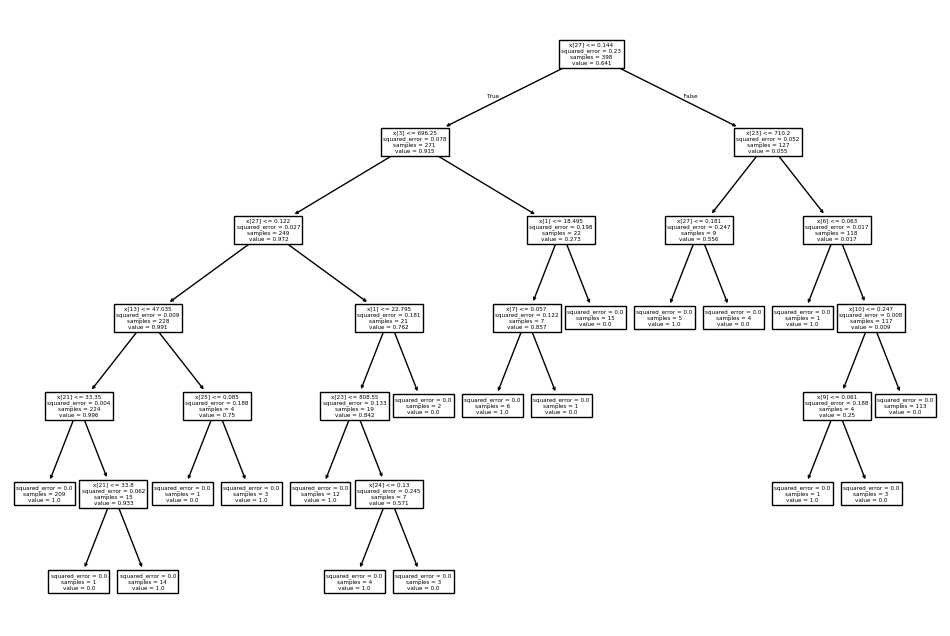

In [ ]:
plot_tree(best_params_tree)

---

## Part 4**: Advanced Topics and Hyperparameter Tuning (15 Tasks)

This section will transform you from a basic decision tree user into an expert practitioner who understands the nuances, limitations, and advanced techniques that separate professional machine learning from academic exercises.

### Tasks 1-3: Understanding Overfitting and Tree Complexity

#### Task 1: Empirical Analysis of Overfitting

Decision trees are notorious for overfitting. This task will help you understand exactly how and why this happens, and how to detect it.

In [ ]:
def analyze_overfitting_behavior(X, y, max_depths=range(1, 21), cv_folds=5):
    """
    Comprehensive analysis of how tree depth affects overfitting.

    This function will create learning curves and validation curves
    to visualize the bias-variance tradeoff in decision trees.

    Parameters:
    X, y: dataset
    max_depths: range of tree depths to test
    cv_folds: number of cross-validation folds

    Returns:
    analysis_results: comprehensive overfitting analysis
    """
    # Your implementation here
    # Create training and validation curves
    # Show how performance changes with tree depth
    # Identify the optimal depth for generalization
    pass

def demonstrate_overfitting_mechanisms():
    """
    Create visualizations showing specific ways decision trees overfit:
    1. Creating overly complex boundaries for simple problems
    2. Memorizing noise in the training data
    3. Building unnecessarily deep trees for small datasets
    """
    # Your implementation here
    # Create synthetic datasets that clearly show overfitting
    # Use 2D data so you can visualize decision boundaries
    pass

# Implement comprehensive overfitting analysis
print("Analyzing overfitting behavior...")

Analyzing overfitting behavior...


#### Task 2: Implementing Multiple Pruning Strategies

In [ ]:
def reduced_error_pruning(tree_root, X_val, y_val):
    """
    Implement reduced error pruning (post-pruning).

    This method removes subtrees that don't improve validation accuracy.
    It's a greedy algorithm that considers pruning each internal node.

    Returns:
    pruned_tree: TreeNode after pruning
    pruning_log: detailed log of pruning decisions
    """
    # Your implementation here
    # Algorithm:
    # 1. For each internal node, calculate validation accuracy if pruned
    # 2. If pruning improves or maintains accuracy, prune the subtree
    # 3. Repeat until no beneficial pruning is possible
    pass

def cost_complexity_pruning(tree_root, X_train, y_train, X_val, y_val):
    """
    Implement cost complexity pruning (also known as minimal error pruning).

    This method uses a complexity parameter α to balance tree size and accuracy.
    It's the method used by sklearn's DecisionTreeClassifier.

    Returns:
    pruning_path: sequence of pruned trees for different α values
    optimal_alpha: best α value based on validation performance
    """
    # Your implementation here
    # This is more complex but gives better theoretical guarantees
    pass

def compare_pruning_methods(X, y, test_size=0.3):
    """
    Compare different pruning strategies on the same dataset.

    Analyze:
    - Final tree size after pruning
    - Generalization performance
    - Computational cost of pruning
    """
    # Your implementation here
    pass

#### Task 3: Bias-Variance Decomposition

In [ ]:
def bias_variance_decomposition(X, y, n_bootstrap=100, test_size=0.3):
    """
    Perform bias-variance decomposition for decision trees.

    This analysis helps understand the fundamental tradeoff in tree complexity:
    - High bias (underfitting): overly simple trees
    - High variance (overfitting): overly complex trees

    Parameters:
    X, y: dataset
    n_bootstrap: number of bootstrap samples for analysis
    test_size: proportion of data for testing

    Returns:
    bias: bias component of the error
    variance: variance component of the error
    noise: irreducible error component
    """
    # Your implementation here
    # Use bootstrap sampling to estimate bias and variance
    # Show how tree depth affects each component
    pass

# Visualize bias-variance tradeoff
def visualize_bias_variance_tradeoff():
    """
    Create comprehensive visualizations showing:
    1. How bias decreases and variance increases with tree complexity
    2. The sweet spot that minimizes total error
    3. How dataset size affects the optimal complexity
    """
    # Your implementation here
    pass

### Tasks 4-6: Feature Importance and Selection

#### Task 4: Multiple Feature Importance Metrics

In [ ]:
def calculate_impurity_based_importance(tree_root, n_features):
    """
    Calculate feature importance based on impurity decrease.

    This is the standard method: features that create larger decreases
    in impurity when used for splitting are considered more important.
    """
    # Your implementation here
    pass

def calculate_permutation_importance(model, X, y, scoring_func, n_repeats=10):
    """
    Calculate permutation-based feature importance.

    This method measures importance by observing how much performance
    decreases when each feature's values are randomly shuffled.
    """
    # Your implementation here
    # For each feature:
    # 1. Randomly permute its values
    # 2. Measure performance decrease
    # 3. Repeat and average
    pass

def calculate_shap_values_approximation(tree_root, X_sample):
    """
    Implement a simplified version of SHAP (SHapley Additive exPlanations).

    SHAP values provide a unified framework for feature importance
    that satisfies certain mathematical properties.
    """
    # Your implementation here
    # This is advanced - focus on understanding the concept
    pass

def compare_importance_methods():
    """
    Compare different feature importance methods and discuss:
    - When they agree vs disagree
    - Computational costs
    - Interpretability for stakeholders
    """
    # Your implementation here
    pass

#### Task 5: Feature Selection Integration

In [ ]:
def recursive_feature_elimination_trees(X, y, n_features_to_select):
    """
    Implement recursive feature elimination using decision trees.

    This method iteratively removes the least important features
    and retrains the model until the desired number remains.
    """
    # Your implementation here
    pass

def mutual_information_feature_selection(X, y, k_best):
    """
    Select features based on mutual information with the target.

    Mutual information measures how much knowing a feature's value
    reduces uncertainty about the target variable.
    """
    # Your implementation here
    pass

def tree_based_feature_selection_pipeline():
    """
    Create a complete pipeline that:
    1. Ranks features by multiple criteria
    2. Selects optimal subset using cross-validation
    3. Evaluates impact on model performance
    """
    # Your implementation here
    pass

#### Task 6: Feature Interaction Analysis

In [ ]:
def detect_feature_interactions(tree_root, feature_names):
    """
    Analyze the decision tree to identify important feature interactions.

    Features that appear together in the same path from root to leaf
    are potentially interacting in their effect on the target.
    """
    # Your implementation here
    # Extract all root-to-leaf paths
    # Identify frequently co-occurring features
    pass

def create_interaction_features(X, feature_names, max_degree=2):
    """
    Create explicit interaction features for tree models.

    While trees can capture interactions implicitly, explicit interaction
    features can sometimes improve performance and interpretability.
    """
    # Your implementation here
    pass

### Tasks 7-9: Cross-Validation and Model Selection

#### Task 7: Advanced Cross-Validation Strategies

In [ ]:
def time_series_cross_validation(X, y, time_index, n_splits=5):
    """
    Implement time series cross-validation for temporal data.

    Unlike random splits, this respects temporal order:
    training always occurs before testing.
    """
    # Your implementation here
    # Create splits that respect temporal order
    # Avoid data leakage from future to past
    pass

def stratified_group_k_fold(X, y, groups, n_splits=5):
    """
    Implement stratified group k-fold cross-validation.

    This ensures that:
    1. Class proportions are maintained (stratified)
    2. Related samples stay together (grouped)
    """
    # Your implementation here
    pass

def nested_cross_validation_with_trees(X, y, param_grid, outer_cv=5, inner_cv=3):
    """
    Implement nested cross-validation for unbiased performance estimation.

    Outer loop: Estimate model performance
    Inner loop: Select hyperparameters

    This provides unbiased estimates of how well your model will
    perform on truly unseen data.
    """
    # Your implementation here
    pass

#### Task 8: Custom Scoring Functions

In [ ]:
def cost_sensitive_scoring(y_true, y_pred, cost_matrix):
    """
    Implement cost-sensitive evaluation for imbalanced problems.

    In many real-world applications, different types of errors
    have different costs (e.g., false negatives in medical diagnosis).
    """
    # Your implementation here
    pass

def profit_based_scoring(y_true, y_pred_proba, profit_matrix):
    """
    Implement profit-based evaluation for business applications.

    Optimize for business metrics rather than traditional ML metrics.
    """
    # Your implementation here
    pass

def fairness_aware_scoring(y_true, y_pred, sensitive_attribute):
    """
    Implement fairness-aware evaluation metrics.

    Measure whether the model makes fair predictions across
    different demographic groups.
    """
    # Your implementation here
    pass

#### Task 9: Automated Hyperparameter Tuning

In [ ]:
def bayesian_optimization_trees(X, y, param_space, n_calls=50):
    """
    Implement Bayesian optimization for hyperparameter tuning.

    This is more efficient than grid search for expensive evaluations.
    Use Gaussian processes to model the objective function.
    """
    # Your implementation here
    # This is advanced - you may use existing libraries
    pass

def multi_objective_optimization(X, y, objectives=['accuracy', 'tree_size']):
    """
    Optimize for multiple objectives simultaneously.

    In practice, we often want to balance performance with interpretability,
    speed, or other criteria.
    """
    # Your implementation here
    pass

### Tasks 10-12: Ensemble Methods and Advanced Trees

#### Task 10: Bootstrap Aggregating (Bagging)

In [ ]:
def implement_bagging_from_scratch(base_estimator_class, n_estimators=10, max_samples=1.0):
    """
    Implement bootstrap aggregating (bagging) from scratch.

    Bagging reduces variance by training multiple trees on bootstrap
    samples and averaging their predictions.
    """
    class BaggingClassifier:
        def __init__(self, base_estimator_class, n_estimators, max_samples):
            # Your implementation here
            pass

        def fit(self, X, y):
            # Your implementation here
            # Create bootstrap samples and train estimators
            pass

        def predict(self, X):
            # Your implementation here
            # Average predictions from all estimators
            pass

    return BaggingClassifier(base_estimator_class, n_estimators, max_samples)

# Test your bagging implementation

#### Task 11: Random Forest from Scratch

In [ ]:
def implement_random_forest_from_scratch(n_estimators=10, max_features='sqrt', max_depth=None):
    """
    Implement Random Forest from scratch.

    Random Forest combines bagging with random feature selection
    to create even more diverse trees.
    """
    class RandomForestClassifier:
        def __init__(self, n_estimators, max_features, max_depth):
            # Your implementation here
            pass

        def fit(self, X, y):
            # Your implementation here
            # Implement bootstrap sampling + random feature selection
            pass

        def predict(self, X):
            # Your implementation here
            pass

        def feature_importances_(self):
            # Your implementation here
            # Aggregate feature importance across all trees
            pass

    return RandomForestClassifier(n_estimators, max_features, max_depth)

def analyze_random_forest_behavior():
    """
    Analyze how Random Forest improves upon single trees:
    1. Variance reduction through averaging
    2. Bias introduction through feature randomness
    3. Out-of-bag error estimation
    """
    # Your implementation here
    pass

#### Task 12: Gradient Boosting Fundamentals

In [ ]:
def implement_gradient_boosting_trees(n_estimators=10, learning_rate=0.1, max_depth=3):
    """
    Implement a simplified version of Gradient Boosting Trees.

    Unlike bagging, boosting trains trees sequentially,
    with each tree learning from the mistakes of previous trees.
    """
    class SimpleGradientBoostingClassifier:
        def __init__(self, n_estimators, learning_rate, max_depth):
            # Your implementation here
            pass

        def fit(self, X, y):
            # Your implementation here
            # Sequential training with residual fitting
            pass

        def predict(self, X):
            # Your implementation here
            pass

    return SimpleGradientBoostingClassifier(n_estimators, learning_rate, max_depth)

def compare_ensemble_methods():
    """
    Compare bagging, random forest, and gradient boosting:
    - Bias-variance characteristics
    - Training time and parallelizability
    - Interpretability
    - Performance on different types of problems
    """
    # Your implementation here
    pass

### Tasks 13-15: Advanced Analysis and Real-World Considerations

#### Task 13: Handling Imbalanced Datasets

In [ ]:
def class_weight_adjustment(y, method='balanced'):
    """
    Calculate class weights for imbalanced datasets.

    Adjust the tree building process to give more importance
    to minority classes.
    """
    # Your implementation here
    pass

def cost_sensitive_tree_building(X, y, cost_matrix):
    """
    Modify tree building to consider misclassification costs.

    Instead of optimizing accuracy, optimize expected cost.
    """
    # Your implementation here
    pass

def smote_with_trees(X, y, sampling_strategy='auto'):
    """
    Combine SMOTE (Synthetic Minority Oversampling Technique) with trees.

    Generate synthetic examples of minority classes to balance the dataset.
    """
    # Your implementation here
    pass

def threshold_optimization_for_imbalanced_data():
    """
    Optimize classification thresholds for imbalanced problems.

    The default 0.5 threshold is often suboptimal for imbalanced data.
    """
    # Your implementation here
    pass

#### Task 14: Computational Efficiency and Scalability

In [ ]:
def analyze_computational_complexity():
    """
    Analyze the computational complexity of decision tree algorithms:

    1. Training complexity: O(n * m * log(n)) where n=samples, m=features
    2. Prediction complexity: O(depth)
    3. Memory complexity: O(nodes)

    Measure actual runtime vs theoretical complexity.
    """
    # Your implementation here
    # Create datasets of varying sizes and measure performance
    pass

def implement_early_stopping(X_train, y_train, X_val, y_val, patience=5):
    """
    Implement early stopping for tree building.

    Stop growing the tree when validation performance stops improving.
    """
    # Your implementation here
    pass

def parallel_tree_building():
    """
    Explore parallelization opportunities in decision trees:

    1. Feature evaluation can be parallelized
    2. Subtree building can be parallelized
    3. Ensemble methods are embarrassingly parallel
    """
    # Your implementation here
    pass

#### Task 15: Production Deployment Considerations

In [ ]:
def model_serialization_and_deployment():
    """
    Implement model serialization for production deployment.

    Consider:
    1. Model size and memory requirements
    2. Prediction speed requirements
    3. Model versioning and updates
    4. A/B testing frameworks
    """
    # Your implementation here
    pass

def model_monitoring_and_drift_detection():
    """
    Implement monitoring for deployed tree models.

    Monitor:
    1. Feature distribution drift
    2. Performance degradation
    3. Concept drift
    4. Adversarial inputs
    """
    # Your implementation here
    pass

def explainable_ai_for_stakeholders():
    """
    Create stakeholder-friendly explanations of tree decisions.

    Different audiences need different types of explanations:
    1. Technical teams: detailed tree structure
    2. Business users: high-level rules
    3. End users: simple explanations for individual predictions
    4. Regulators: audit trails and fairness metrics
    """
    # Your implementation here
    pass

def comprehensive_model_evaluation_framework():
    """
    Create a comprehensive evaluation framework covering:

    1. Statistical performance metrics
    2. Business impact metrics
    3. Fairness and bias assessment
    4. Robustness testing
    5. Interpretability evaluation
    6. Computational efficiency metrics
    """
    # Your implementation here
    # This is your capstone analysis bringing everything together
    pass

---

## Submission Guidelines

**What to Submit:**
1. Complete Jupyter notebook with all implementations, analysis, and visualizations
2. Well-documented code demonstrating deep understanding
3. Comprehensive explanations of your findings and insights
4. Executive summary highlighting key learnings
5. Discussion of decision trees' place in the machine learning landscape

**Evaluation Criteria:**
- **Correctness (25%)**: Accurate manual calculations and implementations
- **Code Quality (20%)**: Clean, well-documented, efficient code
- **Analysis Depth (25%)**: Thorough exploration and meaningful insights
- **Understanding (20%)**: Clear explanations demonstrating comprehension
- **Innovation (10%)**: Creative extensions and novel applications

**Bonus Challenges:**
- Implement decision trees for multi-output problems
- Create an interactive decision tree visualization tool
- Analyze decision trees for time series data
- Implement online/incremental decision tree learning
- Compare decision trees with neural networks on the same problems

**Professional Development:**
This assignment prepares you for real-world machine learning by emphasizing:
- Implementation skills that deepen algorithmic understanding
- Proper experimental methodology and evaluation practices
- Communication skills for technical and non-technical audiences
- Critical thinking about model limitations and appropriate use cases

Remember: The goal extends beyond completing tasks to developing the deep, practical understanding that enables you to use decision trees effectively in your future work. Take time to experiment, ask questions, and connect concepts to build lasting expertise.

**Final Reflection Questions:**
- When would you choose decision trees over other algorithms?
- How do decision trees fit into modern machine learning pipelines?
- What are the most important lessons you've learned about interpretable machine learning?
- How has implementing algorithms from scratch changed your understanding?

Good luck with your comprehensive exploration of decision trees!